# WeatherPy
----
#### This python script was deveolped to obtain weather data for over 500 cities. The weather data is then used to vizualize the relationship between location and weather.
----


## Trends
####    - The only observable trend appears to be in relationship to temperature and latitude, which makes sense since sun intensity is greatest in near the equator. 

####    - No trends appear to exist between cloudiness and latitude. I wouldn't expect a relationship between these two variables, but now we can say that no relationship exists.

####    - Humidity was lowest between latitudes of -20 and 20. This makes sense since many of the deserts throughout the world are found between latitudes of -20 and 20.

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


'cbe528dc2d32cd6e51a705badcf76811'

## Generate Cities List

In [26]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

In [31]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 


'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cbe528dc2d32cd6e51a705badcf76811'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [49]:
# Create empty lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# start record (call) counter
record = 1

# Log file print statement
print(f"Begin Data Retrieval")
print(f"____________________")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")

        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Begin Data Retrieval
____________________
Processing Record 1 | Mataura
City not found. Skipping...
Processing Record 2 | Ulaangom
Processing Record 3 | Verkhoyansk
Processing Record 4 | Ushuaia
Processing Record 5 | Qorveh
Processing Record 6 | Kitui
Processing Record 7 | Vaini
Processing Record 8 | Punta Arenas
Processing Record 9 | Magistralnyy
Processing Record 10 | Alyangula
City not found. Skipping...
Processing Record 11 | Bredasdorp
Processing Record 12 | Mar del Plata
Processing Record 13 | Fairlie
Processing Record 14 | Severo-Kurilsk
Processing Record 15 | Lujan
Processing Record 16 | Castro
Processing Record 17 | Lavrentiya
Processing Record 18 | Moron
Processing Record 19 | Hithadhoo
Processing Record 20 | Nioki
Processing Record 21 | Saint-Philippe
Processing Record 22 | Menomonie
Processing Record 23 | Zelenchukskaya
Processing Record 24 | Hilo
Processing Record 25 | Albany
Processing Record 26 | Povolzhskiy
Processing Record 27 | Kapaa
Processing Record 28 | Puerto Ayor

Processing Record 224 | Kaitangata
City not found. Skipping...
Processing Record 225 | Svetlaya
Processing Record 226 | Mali
Processing Record 227 | Isiro
City not found. Skipping...
Processing Record 228 | Vestmanna
Processing Record 229 | Guerrero Negro
Processing Record 230 | San Patricio
Processing Record 231 | Tuatapere
Processing Record 232 | Ulaanbaatar
Processing Record 233 | Shahrud
Processing Record 234 | Weinan
Processing Record 235 | Abha
Processing Record 236 | Lulea
Processing Record 237 | Broome
City not found. Skipping...
Processing Record 238 | Zaria
Processing Record 239 | Tuktoyaktuk
Processing Record 240 | Nichinan
Processing Record 241 | Talcahuano
Processing Record 242 | Alofi
Processing Record 243 | Zunyi
Processing Record 244 | Saskylakh
Processing Record 245 | Aksarka
Processing Record 246 | Qaqortoq
Processing Record 247 | Cibitoke
Processing Record 248 | Mopipi
Processing Record 249 | Okhotsk
Processing Record 250 | Itambe
Processing Record 251 | Lysva
Proces

Processing Record 462 | Edson
Processing Record 463 | Concordia
Processing Record 464 | Luangwa
Processing Record 465 | San Andres
Processing Record 466 | Grindavik
Processing Record 467 | Kinablangan
Processing Record 468 | Ardakan
Processing Record 469 | Vila
Processing Record 470 | Deputatskiy
City not found. Skipping...
Processing Record 471 | Catuday
Processing Record 472 | Nabire
Processing Record 473 | Beira
Processing Record 474 | Quchan
Processing Record 475 | Solvychegodsk
Processing Record 476 | Ozernovskiy
Processing Record 477 | Bloemfontein
City not found. Skipping...
Processing Record 478 | Ouahigouya
Processing Record 479 | Weingarten
Processing Record 480 | Talas
City not found. Skipping...
Processing Record 481 | Bayan
Processing Record 482 | Falun
Processing Record 483 | Nouadhibou
Processing Record 484 | Pokhara
Processing Record 485 | Brazzaville
Processing Record 486 | Laguna
Processing Record 487 | Izhma
Processing Record 488 | Uray
Processing Record 489 | Stege


In [50]:
# Create a dictonary 
weather_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather = pd.DataFrame(weather_dict)

# Display count of weather data values 
weather.count()

City          541
Cloudiness    541
Country       541
Date          541
Humidity      541
Lat           541
Lng           541
Max Temp      541
Wind Speed    541
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [51]:
# Save to CSV
weather.to_csv('Output/weather.csv')

# Display data frame
weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mataura,100,NZ,1562903958,89,-46.19,168.86,48.99,1.01
1,Ulaangom,100,MN,1562903960,92,49.98,92.07,54.72,6.04
2,Verkhoyansk,82,RU,1562903961,33,67.55,133.39,80.75,5.91
3,Ushuaia,75,AR,1562903962,99,-54.81,-68.31,39.20,14.99
4,Qorveh,0,IR,1562903963,25,35.17,47.80,68.82,3.29


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

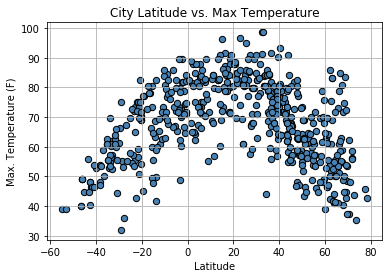

In [52]:
# Build a scatter plot 
plt.scatter(weather["Lat"], weather["Max Temp"], marker="o", s=40, color="steelblue", edgecolors='black')

# Edit graph axis and titles
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/Max_Temp_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

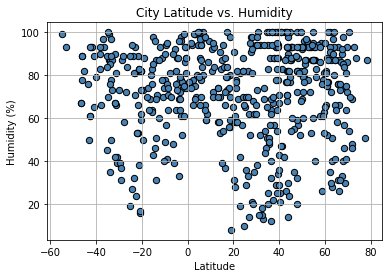

In [53]:
# Build a scatter plot 
plt.scatter(weather["Lat"], weather["Humidity"], marker="o", s=40, color="steelblue", edgecolors='black')

# Edit graph axis and titles
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/Humidity_Latitude.png")

# Show plot
plt.show()


#### Latitude vs. Cloudiness Plot

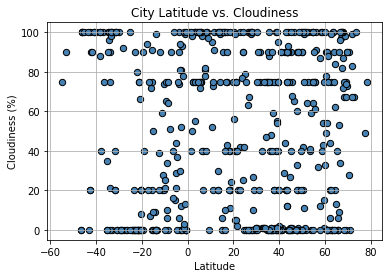

In [54]:
# Build a scatter plot 
plt.scatter(weather["Lat"], weather["Cloudiness"], s=40, color="steelblue", edgecolors='black')

# Edit graph axis and titles
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/Cloudiness_Latitude.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

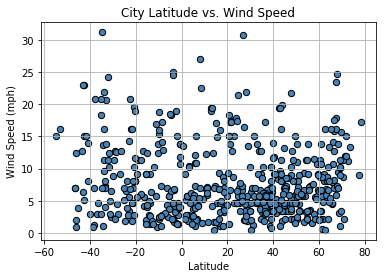

In [55]:
# Build a scatter plot 
plt.scatter(weather["Lat"], weather["Wind Speed"], marker="o", s=40, color="steelblue", edgecolors='black')

# Edit graph axis and titles
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/Wind_Latitude.png")

# Show plot
plt.show()
